In [25]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from data_visualisation.plot import Plot
from utils.utils import read_csv_in_pd
from utils.utils import get_or_drop_na_cols
from utils.utils import replace_categorical_nan_cols
from utils.utils import replace_numerical_nan_cols
from utils.utils import convert_categorical_to_one_hot_encoding
from utils.utils import get_cols_with_nan_values

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [2]:
train_data = read_csv_in_pd("house-prices-advanced-regression-techniques", "train.csv")
test_data = read_csv_in_pd("house-prices-advanced-regression-techniques", "test.csv")

<IPython.core.display.Javascript object>

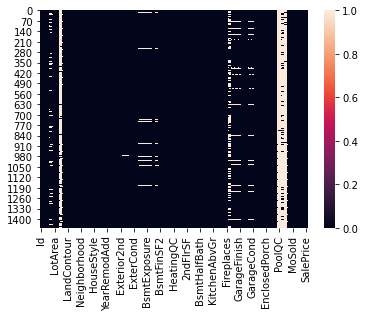

<IPython.core.display.Javascript object>

In [3]:
sns.heatmap(train_data.isnull())

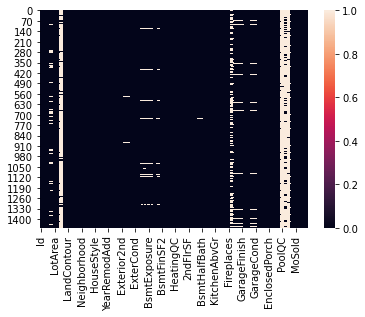

<IPython.core.display.Javascript object>

In [4]:
sns.heatmap(test_data.isnull())

In [5]:
nan_cols_train = get_or_drop_na_cols(
    train_data, threshold=0.5, drop=True
)  # drop na columns with more than 50% nan values



<IPython.core.display.Javascript object>

In [6]:
train_data.drop(["Id"], axis="columns", inplace=True)
test_data.drop(["Id"], axis="columns", inplace=True)

<IPython.core.display.Javascript object>

In [7]:
missing_train_cols = get_cols_with_nan_values(train_data)

<IPython.core.display.Javascript object>

In [8]:
missing_numerical_features = ["LotFrontage", "MasVnrArea"]
missing_categorical_features = [
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Electrical",
    "FireplaceQu",
    "GarageType",
    "GarageYrBlt",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
]

<IPython.core.display.Javascript object>

In [9]:
replace_categorical_nan_cols(
    train_data, missing_categorical_features, replace_func="mode"
)
replace_numerical_nan_cols(train_data, missing_numerical_features, replace_func="mean")

<IPython.core.display.Javascript object>

In [10]:
train_data.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [11]:
get_or_drop_na_cols(test_data, threshold=0.5, drop=True)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

<IPython.core.display.Javascript object>

In [12]:
missing_test_cols = get_cols_with_nan_values(test_data)

<IPython.core.display.Javascript object>

In [13]:
test_categorical_features = [
    "MSZoning",
    "Utilities",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "BsmtFullBath",
    "BsmtHalfBath",
    "KitchenQual",
    "Functional",
    "GarageType",
    "GarageFinish",
    "GarageYrBlt",
    "GarageCars",
    "GarageQual",
    "GarageCond",
    "SaleType",
]
test_numerical_features = (list(list(set(missing_test_cols)-set(test_categorical_features)) + list(set(test_categorical_features)-set(missing_test_cols))))


<IPython.core.display.Javascript object>

In [14]:
replace_categorical_nan_cols(test_data, test_categorical_features, replace_func="mode")
replace_numerical_nan_cols(test_data, test_numerical_features, replace_func="mean")

<IPython.core.display.Javascript object>

In [15]:
get_cols_with_nan_values(test_data)

[]

<IPython.core.display.Javascript object>

In [34]:
final_df = pd.concat([train_data, test_data], axis=0)

<IPython.core.display.Javascript object>

In [35]:
all_categorical_features = [
    "MSZoning",
    "Street",
    "LotShape",
    "LandContour",
    "Utilities",
    "LotConfig",
    "LandSlope",
    "Neighborhood",
    "Condition2",
    "BldgType",
    "Condition1",
    "HouseStyle",
    "SaleType",
    "SaleCondition",
    "ExterCond",
    "ExterQual",
    "Foundation",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "RoofStyle",
    "RoofMatl",
    "Exterior1st",
    "Exterior2nd",
    "MasVnrType",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
]

<IPython.core.display.Javascript object>

In [36]:
cleaned_df = convert_categorical_to_one_hot_encoding(final_df, all_categorical_features)

<IPython.core.display.Javascript object>

In [39]:
cleaned_df = cleaned_df.loc[:, ~cleaned_df.columns.duplicated()]

cleaned_train_data = cleaned_df.iloc[:1460, :]
cleaned_test_data = cleaned_df.iloc[1460:, :]

cleaned_df.shape

(2919, 177)

<IPython.core.display.Javascript object>

In [40]:
y_train = cleaned_train_data["SalePrice"]
X_train = cleaned_train_data.drop("SalePrice", axis=1)

<IPython.core.display.Javascript object>

In [41]:
import xgboost

regressor = xgboost.XGBRegressor()

<IPython.core.display.Javascript object>

In [42]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ["gbtree", "gblinear"]
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "learning_rate": learning_rate,
    "min_child_weight": min_child_weight,
    "booster": booster,
    "base_score": base_score,
}

random_cv = RandomizedSearchCV(
    estimator=regressor,
    param_distributions=hyperparameter_grid,
    cv=5,
    n_iter=50,
    scoring="neg_mean_absolute_error",
    n_jobs=4,
    verbose=5,
    return_train_score=True,
    random_state=42,
)

random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   23.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 11.8min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 17.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

<IPython.core.display.Javascript object>

In [43]:
regressor = xgboost.XGBRegressor(
    base_score=0.25,
    booster="gbtree",
    colsample_bylevel=1,
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.1,
    max_delta_step=0,
    max_depth=2,
    min_child_weight=1,
    missing=None,
    n_estimators=900,
    n_jobs=1,
    nthread=None,
    objective="reg:linear",
    random_state=0,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    seed=None,
    silent=True,
    subsample=1,
)

<IPython.core.display.Javascript object>

In [44]:
regressor.fit(X_train, y_train)

[02:17:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[02:17:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[02:17:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=1, nthread=1, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=0, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

In [50]:
X_test = cleaned_test_data.drop("SalePrice", axis=1)

y_pred = regressor.predict(X_test)

<IPython.core.display.Javascript object>

In [51]:
pred = pd.DataFrame(y_pred)
sample_submission = read_csv_in_pd(
    "house-prices-advanced-regression-techniques", "sample_submission.csv"
)

dataset = pd.concat([sample_submission["Id"], pred], axis=1)
dataset.columns = ["Id", "SalePrice"]
dataset.to_csv("sample_submission.csv", index=False)

<IPython.core.display.Javascript object>

In [52]:
dataset

,Id,SalePrice
0,1461,122193.101562
1,1462,160807.062500
2,1463,185308.500000
3,1464,193738.406250
4,1465,196084.687500
...,...,...
1454,2915,81693.421875
1455,2916,63700.167969
1456,2917,175296.718750
1457,2918,120029.437500


<IPython.core.display.Javascript object>